# BERT - Cosine Similarity
* Notebook by Adam Lang
* Date: 6/23/2024
* In this notebook we will look at cosine similarity using BERT.

# What is input to BERT?
* Sum of:
1. Token embeddings
  * Result of wordpiece/sub-word tokenizer.
  * Hidden Size is 768.
  * Sequence length max is 512
  * Input embedding is: 512 x 768
  * Token embeddings also include the special tokens:
    * [CLS] - classifier
    * [SEP] - separator (separates sentences)
2. Segment embeddings
  * The unique sentences in the text.
3. Position embeddings
  * postion of each word in a sentence.

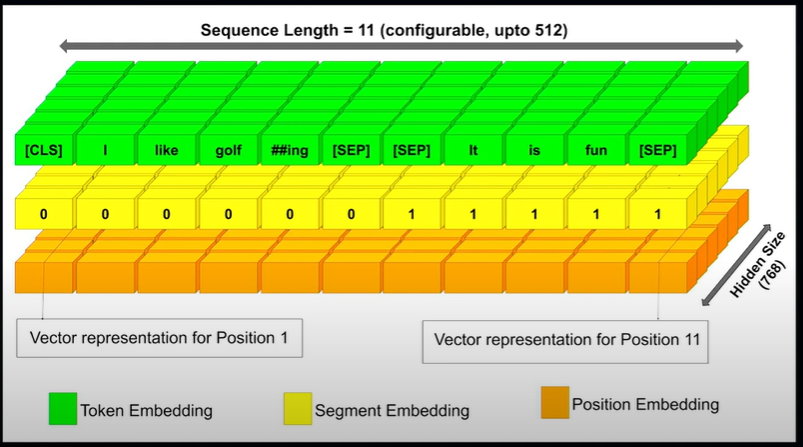

* The final input to BERT is the sum of all 3 embedding types:
  * token + segment + position
* Max input tensor size to BERT is sequence length of 512 with hidden size 768 --> input is 512 x 768

## Why apply the 512 max token limit?
* Related to memory input.

# Implementation


In [14]:
## sentences we want to compare
sentences = [
    "It had been twenty days since the first zombie attack.",
    "When confronted with a rotary dial phone the teenager was perplexed.",
    "His confidence would have been admirable if it wasn't for his stupidity.",
    "I'm confused: when people ask me what's up, and I point, they groan.",
    "They called out her name time and time again, but were met with nothing but silence.",
    "After the last zombie attack twenty days back, they are now taking control of the city."


]

In [15]:
## imports
from transformers import AutoTokenizer, AutoModel
import torch

## HuggingFace Model
* We will use the `all-mpnet-base-v2`
* Documentation: https://huggingface.co/sentence-transformers/all-mpnet-base-v2
* This is a sentence-transformers model: It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [4]:
## first need to install sentence transformers
!pip install -U sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 1.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

## Load Model

In [5]:
# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

## Tokenization process
* Before using tokenizer we should create a dictionary to store the tokens

In [16]:
## test cell
test_sent = "Today it is snowing."
new_tokens = tokenizer.encode_plus(test_sent, max_length=512, truncation=True, padding='max_length', return_tensors='pt')
new_tokens.keys()

dict_keys(['input_ids', 'attention_mask'])

Note about code below:
* `encode_plus` returns additional information in a dictionary structure as opposed to `encode`.

In [17]:
tokens = {'input_ids': [], 'attention_mask': [] }

# loop over sentence list
for sentence in sentences:
  new_tokens = tokenizer.encode_plus(sentence, max_length= 512, truncation=True, padding='max_length', return_tensors='pt')
  # append tokens
  tokens['input_ids'].append(new_tokens['input_ids'][0])
  tokens['attention_mask'].append(new_tokens['attention_mask'][0])

# restructure a list of tensors into single tensor
tokens['input_ids'] = torch.stack(tokens['input_ids'])
tokens['attention_mask'] = torch.stack(tokens['attention_mask'])


In [18]:
# check input_id shape
tokens['input_ids'].shape

torch.Size([6, 512])

## Invoke model

In [19]:
outputs = model(**tokens)
outputs

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 5.4512e-02,  1.2461e-01,  2.8609e-02,  ...,  4.5040e-02,
          -2.1522e-01, -1.2738e-01],
         [ 1.9801e-01,  2.5555e-01,  5.5805e-02,  ...,  1.1661e-01,
          -2.1680e-01, -7.3816e-02],
         [ 1.2923e-01,  2.1667e-01,  3.9211e-02,  ...,  4.9298e-02,
          -1.6235e-01, -6.2349e-02],
         ...,
         [ 7.9445e-02,  1.9836e-01,  1.5418e-02,  ...,  1.8486e-01,
          -1.5493e-01, -4.7529e-02],
         [ 7.9445e-02,  1.9836e-01,  1.5418e-02,  ...,  1.8486e-01,
          -1.5493e-01, -4.7529e-02],
         [ 7.9445e-02,  1.9836e-01,  1.5418e-02,  ...,  1.8486e-01,
          -1.5493e-01, -4.7529e-02]],

        [[ 1.2549e-01, -1.0631e-01,  3.6857e-02,  ...,  6.0813e-02,
          -9.1068e-02,  3.6397e-02],
         [ 1.5688e-01, -2.4870e-01,  4.6817e-03,  ...,  8.2096e-02,
          -1.8744e-01,  7.9757e-02],
         [ 1.9245e-01, -1.4947e-01,  6.3418e-02,  ...,  1.9506e-01,
          -8.3352e-02,  5.4228e

In [20]:
# check output keys
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

Note about **last hidden state**
* Contains information about each hidden state of each sequence of the batch.
* 3 dim tensor
* Outputs of last hidden states at last output layer of the model.
* Each single token produces a single vector of size 768 = hidden state.

In [21]:
## get last hidden state
embeddings = outputs.last_hidden_state
embeddings

tensor([[[ 5.4512e-02,  1.2461e-01,  2.8609e-02,  ...,  4.5040e-02,
          -2.1522e-01, -1.2738e-01],
         [ 1.9801e-01,  2.5555e-01,  5.5805e-02,  ...,  1.1661e-01,
          -2.1680e-01, -7.3816e-02],
         [ 1.2923e-01,  2.1667e-01,  3.9211e-02,  ...,  4.9298e-02,
          -1.6235e-01, -6.2349e-02],
         ...,
         [ 7.9445e-02,  1.9836e-01,  1.5418e-02,  ...,  1.8486e-01,
          -1.5493e-01, -4.7529e-02],
         [ 7.9445e-02,  1.9836e-01,  1.5418e-02,  ...,  1.8486e-01,
          -1.5493e-01, -4.7529e-02],
         [ 7.9445e-02,  1.9836e-01,  1.5418e-02,  ...,  1.8486e-01,
          -1.5493e-01, -4.7529e-02]],

        [[ 1.2549e-01, -1.0631e-01,  3.6857e-02,  ...,  6.0813e-02,
          -9.1068e-02,  3.6397e-02],
         [ 1.5688e-01, -2.4870e-01,  4.6817e-03,  ...,  8.2096e-02,
          -1.8744e-01,  7.9757e-02],
         [ 1.9245e-01, -1.4947e-01,  6.3418e-02,  ...,  1.9506e-01,
          -8.3352e-02,  5.4228e-02],
         ...,
         [ 1.3306e-01,  4

In [22]:
# shape
embeddings.shape

torch.Size([6, 512, 768])

Summary:
* We can see the batch size is 6 sentences, the sequence length is 512, and the last hidden state is 768.

## Concept of Pooling Layers
* What is the pooling layer?
  * BERT produces contextualized word embeddings for all input.
  * Mean pooling is average of all token embeddings --> condensed to 1 mean pooling layer

In [23]:
# get attention mask
attention_mask = tokens['attention_mask']
attention_mask.shape

torch.Size([6, 512])

In order to multiply the attention mask and the embedding we need to expand the attention mask the same size.

We can see the embeddings are a 3 dimensional tensor, and the attention_mask is a 2 dimensional tensor. So we will need to do some transformation.

In [25]:
## apply unsqueeze
resized_attention_mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()
resized_attention_mask.shape

torch.Size([6, 512, 768])

In [26]:
resized_attention_mask

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [27]:
## check the shape
resized_attention_mask[0][0].shape

torch.Size([768])

Each token has a vector of size 768 representing the attention_mask status.

In [28]:
## now multiply embeddings * resized_attention_mask
masked_embedding = embeddings * resized_attention_mask
masked_embedding.shape

torch.Size([6, 512, 768])

In [29]:
masked_embedding

tensor([[[ 5.4512e-02,  1.2461e-01,  2.8609e-02,  ...,  4.5040e-02,
          -2.1522e-01, -1.2738e-01],
         [ 1.9801e-01,  2.5555e-01,  5.5805e-02,  ...,  1.1661e-01,
          -2.1680e-01, -7.3816e-02],
         [ 1.2923e-01,  2.1667e-01,  3.9211e-02,  ...,  4.9298e-02,
          -1.6235e-01, -6.2349e-02],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          -0.0000e+00, -0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          -0.0000e+00, -0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          -0.0000e+00, -0.0000e+00]],

        [[ 1.2549e-01, -1.0631e-01,  3.6857e-02,  ...,  6.0813e-02,
          -9.1068e-02,  3.6397e-02],
         [ 1.5688e-01, -2.4870e-01,  4.6817e-03,  ...,  8.2096e-02,
          -1.8744e-01,  7.9757e-02],
         [ 1.9245e-01, -1.4947e-01,  6.3418e-02,  ...,  1.9506e-01,
          -8.3352e-02,  5.4228e-02],
         ...,
         [ 0.0000e+00,  0

In [31]:
# mean pooling
summed_masked_embeddings = torch.sum(masked_embedding, 1)
summed_masked_embeddings.shape

torch.Size([6, 768])

In [32]:
summed_masked_embeddings

tensor([[ 1.2427,  2.5238,  0.3613,  ...,  1.3365, -2.8568, -0.6771],
        [ 2.5646, -1.7509,  0.7735,  ...,  1.0171, -1.7503,  1.2193],
        [-0.7611,  4.0010,  0.2158,  ..., -2.2397,  1.1004,  0.8693],
        [ 1.5776, -3.6690, -0.8673,  ...,  2.7474,  2.0530, -3.2321],
        [ 3.9910,  1.3663, -0.0338,  ...,  1.9355, -2.6091,  1.9909],
        [-0.2276,  2.2196,  1.5436,  ...,  1.3212, -1.7718, -1.0122]],
       grad_fn=<SumBackward1>)

### Using `torch.clamp()`
* Clamps all elements in input into the range [ min, max ]. Letting min_value and max_value be min and max, respectively, this returns:
* docs: https://pytorch.org/docs/stable/generated/torch.clamp.html
* This will give the count of cells where there should not be a mask.

In [33]:
count_of_one_in_mask_tensor = torch.clamp(resized_attention_mask.sum(1), min=1e-9)

count_of_one_in_mask_tensor.shape

torch.Size([6, 768])

In [34]:
count_of_one_in_mask_tensor

tensor([[13., 13., 13.,  ..., 13., 13., 13.],
        [16., 16., 16.,  ..., 16., 16., 16.],
        [19., 19., 19.,  ..., 19., 19., 19.],
        [23., 23., 23.,  ..., 23., 23., 23.],
        [20., 20., 20.,  ..., 20., 20., 20.],
        [20., 20., 20.,  ..., 20., 20., 20.]])

### Calculate mean pooling now

In [35]:
mean_pooled = summed_masked_embeddings / count_of_one_in_mask_tensor

In [36]:
mean_pooled

tensor([[ 0.0956,  0.1941,  0.0278,  ...,  0.1028, -0.2198, -0.0521],
        [ 0.1603, -0.1094,  0.0483,  ...,  0.0636, -0.1094,  0.0762],
        [-0.0401,  0.2106,  0.0114,  ..., -0.1179,  0.0579,  0.0458],
        [ 0.0686, -0.1595, -0.0377,  ...,  0.1195,  0.0893, -0.1405],
        [ 0.1995,  0.0683, -0.0017,  ...,  0.0968, -0.1305,  0.0995],
        [-0.0114,  0.1110,  0.0772,  ...,  0.0661, -0.0886, -0.0506]],
       grad_fn=<DivBackward0>)

In [37]:
mean_pooled.shape

torch.Size([6, 768])

# Calculate cosine similarity for sentence 0

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# detach gradients
mean_pooled = mean_pooled.detach().numpy()

# calculate cosine similarity - 2 arguments passed
## mean_pooled of sentence vs. all other sentences
cosine_similarity([mean_pooled[0]], mean_pooled[1:])

array([[0.11441986, 0.05706315, 0.00615248, 0.23848216, 0.62197554]],
      dtype=float32)

# Summary
* We can see the cosine similarity scores above are all low except for the final value which is highest and this makes sense as it is most similar to sentence 0.
* Recall sentence 0: "It had been twenty days since the first zombie attack."
* And the final sentence: "After the last zombie attack twenty days back, they are now taking control of the city."